In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
matdata = loadmat('Data/Lab 7/ex7data1.mat')
X = matdata['X']
print(X.shape)

X -= X.mean(0) 
X /= np.std(X, axis=0)

(50, 2)


In [3]:
def cov(x):
    """
    Parameters:
        x: array, shape (m, n)
    
    Returns
        Σ: array, shape (n, n)        
    """
    m, n = x.shape
    return X.T.dot(X) / m


def compress(k, u, x, s=0):
    U_reduce = u[:, s:k]
    return U_reduce.T.dot(x.T)


def decompress(k, u, z, s=0):
    U_reduce = u[:, s:k]
    return U_reduce.dot(z).T


print(cov(X) == np.cov(X.T))

[[False False]
 [False False]]


In [4]:
Sigma = np.cov(X.T)
U, S, V = np.linalg.svd(Sigma)

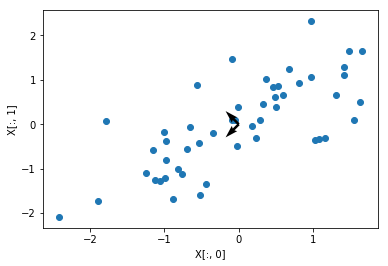

In [5]:
ax = plt.subplot()
ax.scatter(X[:, 0], X[:, 1])

ax.set_xlabel('X[:, 0]')
ax.set_ylabel('X[:, 1]')

ax.quiver(*U[:, 0])
ax.quiver(*U[:, 1])

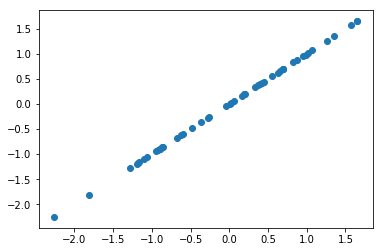

In [6]:
ax = plt.subplot()
k = 1

z = compress(k, U, X)[0]
x = decompress(k, U, [z])
ax.scatter(x[:, 0], x[:, 1])

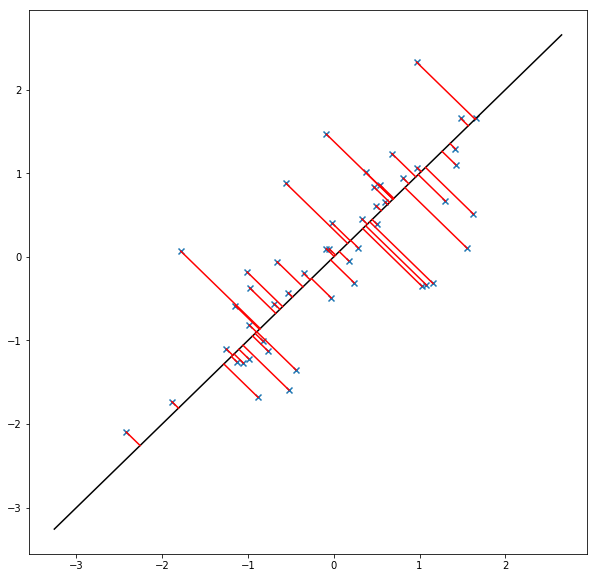

In [7]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(X[:, 0], X[:, 1], marker='x')

ax.plot(
    *np.array([x.min(axis=0)-1, x.max(axis=0)+1]).T,
    c='black')

for xi, Xi in zip(x, X):
    ax.plot([xi[0], Xi[0]],
            [xi[1], Xi[1]], c='red')

# PART 2

In [8]:
import random
import heapq
from PIL import Image
from itertools import product

In [9]:
def plot_random_images(k, n, m, x, h, w):
    _, ax = plt.subplots(m, n, figsize=(10, 10))
    images = np.array(random.choices(x, k=k))
    images = images.reshape(k, h, w)
    for (i, j), img in zip(product(range(m), range(n)), images):
        ax[i][j].imshow(img.T)


def plot_images(k, n, m, x, h, w):
    _, ax = plt.subplots(m, n, figsize=(10, 10))
    images =  x[:k]
    images = images.reshape(k, h, w)
    for (i, j), img in zip(product(range(m), range(n)), images):
        ax[i][j].imshow(img.T)

        
def plot_u(u, k, m, n, h, w):
    _, ax = plt.subplots(m, n, figsize=(10, 10))

    for i, j in product(range(m), range(n)):
        idx = i * m + j
        img = u[:, idx].reshape(h, w).T
        ax[i][j].imshow(img)

In [10]:
matdata = loadmat('Data/Lab 7/ex7faces.mat')
X = matdata['X']
print(X.shape)

(5000, 1024)


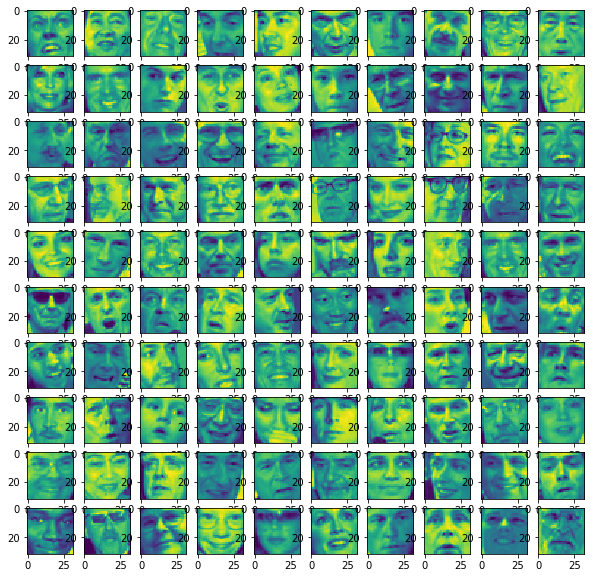

In [11]:
plot_random_images(k=100, m=10, n=10, 
                   x=X, h=32, w=32)

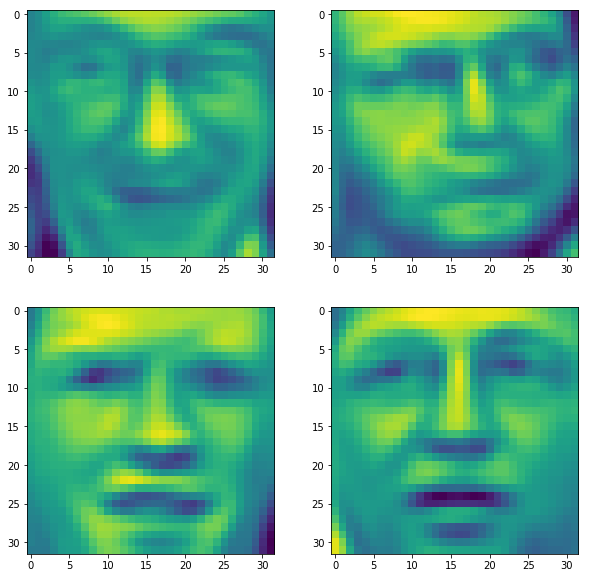

In [12]:
Sigma = cov(X)
U, S, V = np.linalg.svd(Sigma)
z = compress(100, U, X)
x = decompress(100, U, z)
plot_images(k=4, m=2, n=2, x=x, h=32, w=32)

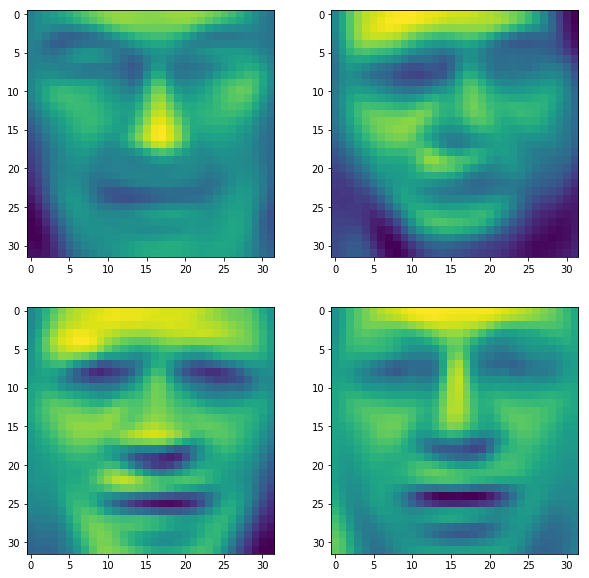

In [13]:
Sigma = cov(X)
U, S, V = np.linalg.svd(Sigma)
z = compress(36, U, X)
x = decompress(36, U, z)
plot_images(k=4, m=2, n=2, x=x, h=32, w=32)

In [14]:
image = Image.open('Data/Lab 6/grizzly-1.png')
A = np.array(image)
HEIGHT, WIDTH, _ = A.shape
print('A: ', A.shape)

X = np.array([
    ( A[:, :, i].flatten() - A[:, :, i].min() ) /  ( A[:, :, i].max() - A[:, :, i].min() )
    for i in range(3)]).T
print('X: ', X.shape)

A:  (277, 371, 3)
X:  (102767, 3)


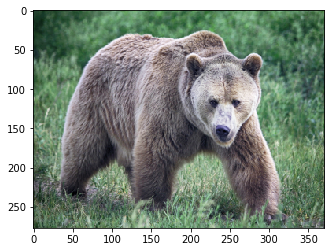

In [15]:
a = X.reshape(HEIGHT, WIDTH, 3)
ax = plt.subplot()
ax.imshow(a)

Text(0.5,0,'Blue')

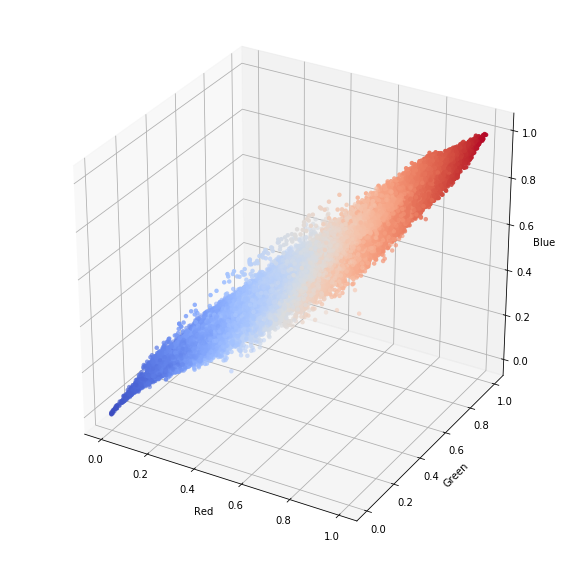

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import cm

ax = plt.figure(figsize=(10,10)).gca(projection='3d')

r, g, b = X.T
ax.scatter(
    r, g, b, c=r,
    cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

In [17]:
K = 2

Sigma = cov(X)
U, S, V = np.linalg.svd(Sigma)

z = compress(K, U, X)
x = decompress(K, U, z)

Text(0.5,0,'Blue')

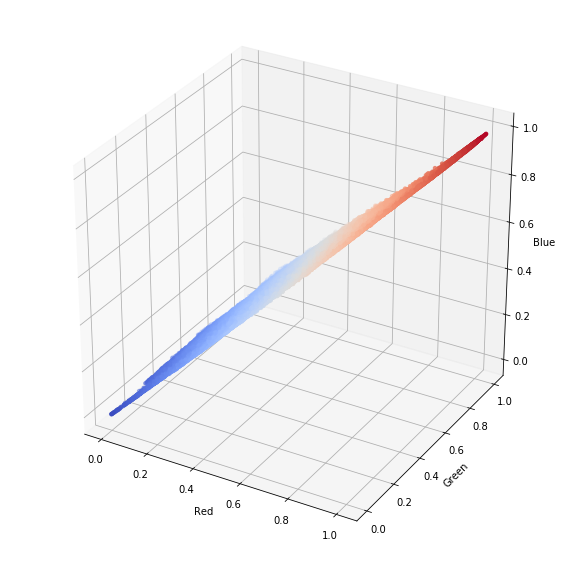

In [18]:
ax = plt.figure(figsize=(10,10)).gca(projection='3d')

r, g, b = x.T
ax.scatter(
    r, g, b, c=r,
    cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

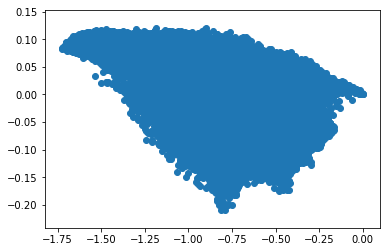

In [19]:
ax = plt.subplot()
ax.scatter(z[0], z[1])